# INF 674 S4: Power Laws

## Céline Comte & Fabien Mathieu

## 2016 - 2017

If you want to deepen your theoretical knowledge of power laws, you can read (this is **not** mandatory):
- A.-L. Barabasi and R. Albert, **Emergence of scaling in random networks**, Science, 286, 509–512, 1999.
- Chapter 7 from the book [Epidemics and Rumours in Complex Networks][massoulie].
- MEJ Newman, **Power laws, Pareto distributions and Zipf's law**. Contemporary Physics Vol. 46 , Iss. 5, 2005.

[massoulie]: http://www.lincs.fr/wp-content/uploads/2013/01/CUP_book_final.pdf "Epidemics and Rumours in Complex Networks by Moez Draief and Laurent Massoulié"

Further readings:
- M. Mitzenmacher, **A Brief History of Generative Models for Power Law and Lognormal Distributions**. Internet Mathematics 1.2, 226-251, 2004.
- A. Broder, R. Kumar, F. Maghoul, P. Raghavan, S. Rajagopalan, R. Stata, A. Tomkins, and J. Wiener, **Graph structure in the Web**. Comput. Netw. 33, 1-6, 309-320, 2000.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 1. Definition

## Heavy-tailed distribution

A continuous real random variable $X$ has a power-law distribution if its tail fails according to some power:

$$
\mathbb{P}\left\{ X > x \right\}
= \left( \frac{x_{min}}{x} \right)^\beta,
\quad \forall x \ge x_{min}.
$$

- $\beta > 0$ is the *shape paremeter*
- $x_{min} > 0$ is the *scale parameter*

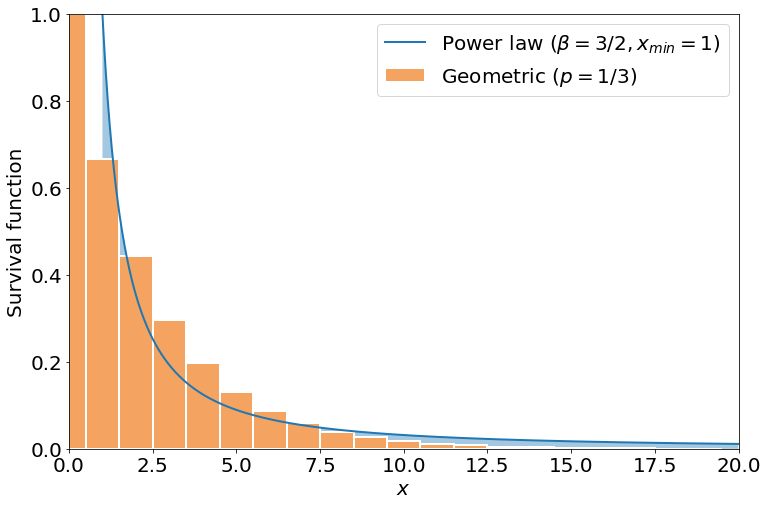

In [2]:
# Power law arguments
xmin = 1.
t = arange(xmin, 20, 0.01)
beta = 1.5

# Geometric law arguments
p = (beta - 1) / beta
n = arange(0, 20, 1)

# CCDF
fig = figure(figsize=(12,8))
clf()

plot(t, pow(xmin/t, beta), label = r'Power law ($\beta = 3/2, x_{min} = 1$)', linewidth=2.0)
fill_between(t, 0, pow(xmin/t, beta), alpha = .4)
bar(n, pow(1-p, n), 1, color = "sandybrown", edgecolor = "white",
    label = r'Geometric ($p = 1/3$)', linewidth=2.0)

axis([0, 20, 0, 1.])
xticks(fontsize = 20)
yticks(fontsize = 20)
xlabel("$x$", fontsize = 20)
ylabel("Survival function", fontsize = 20)
legend(fontsize = 20)
show()

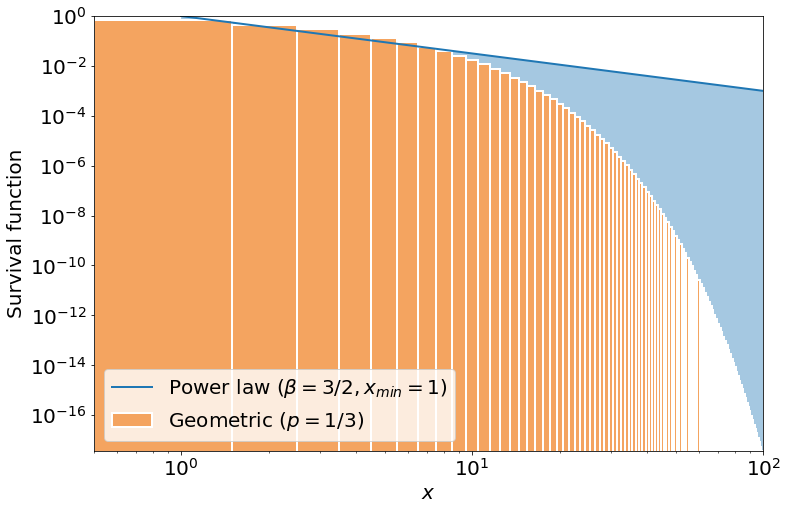

In [3]:
# CCDF semilog
t = arange(xmin, 100, 0.01)
n = arange(0, 100, 1)

fig = figure(figsize=(12,8))
ax = fig.add_subplot(111)

ax.loglog(t, pow(xmin/t, beta), label = r'Power law ($\beta = 3/2, x_{min} = 1$)', linewidth=2.0)
fill_between(t, 0, pow(xmin/t, beta), alpha = .4)
ax.bar(n, pow(1-p, n), 1, color = "sandybrown", edgecolor = "white",
       label = r'Geometric ($p = 1/3$)', linewidth=2.0)

ax.set_xscale("log", nonposy='clip')
ax.set_yscale("log", nonposy='clip')
axis([0, 100, 0, 1.])
xticks(fontsize = 20)
yticks(fontsize = 20)
xlabel("$x$", fontsize = 20)
ylabel("Survival function", fontsize = 20)
legend(loc = 3, fontsize = 20)
show()

## Distribution functions

- Probability distribution function

$$
f(t) = \frac{\beta {x_{min}}^\beta}{t^{\beta + 1}}, \quad \forall t \ge x_{min}.
$$

- Cumulative distribution function

$$
\mathbb{P}\left\{ X \le x \right\}
= 1 - \left( \frac{x_{min}}{x} \right)^\beta,
\quad \forall x \ge x_{min}.
$$

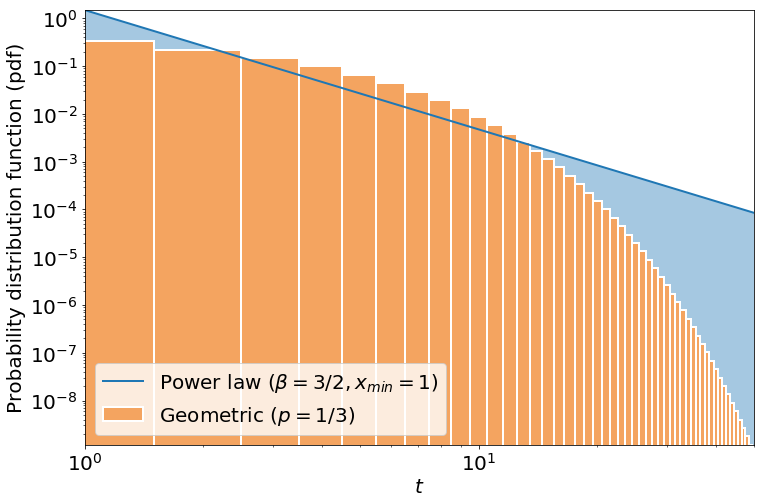

In [4]:
t = arange(xmin, 50, 0.01)
n = arange(1, 50, 1)
s = arange(0, 50, 0.01)

# PDF
fig = figure(figsize=(12,8))
ax = fig.add_subplot(111)

ax.loglog(t, beta * pow(xmin, beta) / pow(t, beta + 1),
     label = r'Power law ($\beta = 3/2, x_{min} = 1$)', linewidth=2.0)
fill_between(t, 0, beta * pow(xmin, beta) / pow(t, beta + 1), alpha = .4)
ax.bar(n, p * pow(1-p, n-1), 1, color = "sandybrown", edgecolor = "white",
    label = r'Geometric ($p = 1/3$)', linewidth=2.0)

ax.set_xscale("log", nonposy='clip')
ax.set_yscale("log", nonposy='clip')
axis([1, 50, 0, 1.5])
xticks(fontsize = 20)
yticks(fontsize = 20)
xlabel("$t$", fontsize = 20)
ylabel("Probability distribution function (pdf)", fontsize = 20)
legend(loc = 3, fontsize = 20)
show()

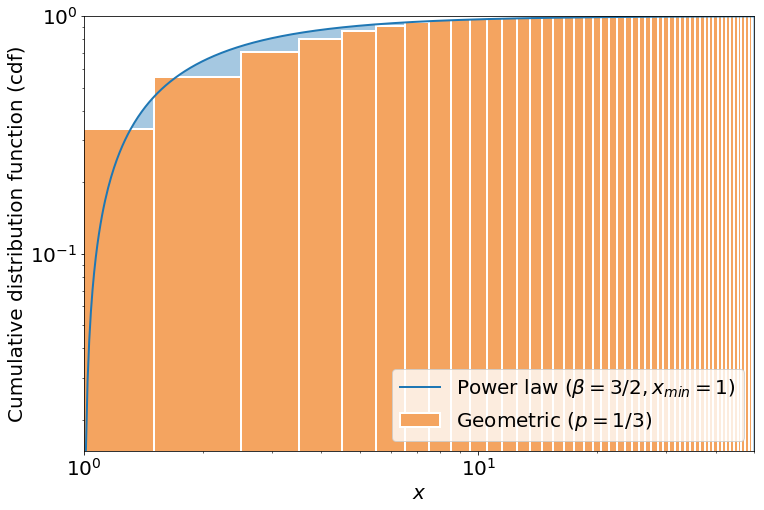

In [5]:
t = arange(xmin, 50, 0.01)
n = arange(1, 50, 1)

#CDF
fig = figure(figsize=(12,8))
ax = fig.add_subplot(111)

ax.loglog(t, 1 - pow(xmin/t, beta), label = r'Power law ($\beta = 3/2, x_{min} = 1$)', linewidth=2.0)
fill_between(t, 0, 1 - pow(xmin/t, beta), alpha = .4)
ax.bar(n, 1 - pow(1-p, n), 1, color = "sandybrown", edgecolor = "white",
    label = r'Geometric ($p = 1/3$)', linewidth=2.0)

ax.set_xscale("log", nonposy='clip')
ax.set_yscale("log", nonposy='clip')
axis([1, 50, 0, 1])
xticks(fontsize = 20)
yticks(fontsize = 20)
xlabel("$x$", fontsize = 20)
ylabel("Cumulative distribution function (cdf)", fontsize = 20)
legend(loc = 4, fontsize = 20)
show()

## How to recognize them?

- Probability distribution function
$$
f(t) = \frac{\beta {x_{min}}^\beta}{t^{\beta + 1}},
\quad \forall t \ge x_{min},
$$
can be rewritten as
$$
\ln(f(t)) = \ln(\beta {x_{min}}^\beta) - (\beta + 1) \ln(t),
\quad \forall t \ge x_{min}.
$$


- The graph of the probability distribution function of a random variable with a power law is a line on a log-log plot.

# 2. Power Laws in the wilde

## Zipf's Law for rankings

- Discrete version of the power law
- A discrete random variable $X$ which takes its values in $\{1,\ldots,N\}$ has a Zipf's distribution with parameter $\tau > 0$ if

  $$
      \mathbb{P}\{ X = k \}
      = \frac{ \frac1{k^\tau} }{ \sum_{n=1}^N \frac1{n^\tau} },
      \quad \forall k = 1,\ldots,N.
  $$

## Web graph

A. Broder, R. Kumar, F. Maghoul, P. Raghavan, S. Rajagopalan, R. Stata, A. Tomkins, and J. Wiener, **Graph structure in the Web**. Comput. Netw. 33, 1-6, 309-320, 2000.

Concretely:

"...  there are many small elements contained within the Web, but few  large  ones.  A  few  sites consist  of  millions of  pages,  but  millions  of  sites  only  contain a handful of pages. Few sites contain millions of links, but many sites have one or two. Millions of users flock to a few select sites, giving little attention to millions of others."

L.A. Adamic and A.H. Bernardo, **Zipf’s law and the Internet**. Glottometrics 3.1, 143-150 2002.

## Other examples

- Word frequency

  "Zipf's law states that given some corpus of natural language utterances, the frequency of any word is inversely proportional to its rank in the frequency table. Thus the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word, etc.: the rank-frequency distribution is an inverse relation." See <a href="https://en.wikipedia.org/wiki/Zipf's_law">Wikipedia, Zipf's law</a>.


- Number of telephone calls per user and per day
- Content popularity

# 3. Generative models

## 3.1. Barabási-Albert random graphs

A.-L. Barabasi and R. Albert, **Emergence of scaling in random networks**, Science, 286, 509–512, 1999.

## (Undirected) Random graph model

- At time $t = 0$, we consider a deterministic initial (undirected) graph $G(0)$
- At each step $t \ge 1$, a new node is added to the graph and is attached to one existing node:
  - With probability $0 \le \alpha < 1$, all existing nodes can be chosen with the same probability,
  - With probability $1 - \alpha$, the probability of choosing a node is proportional to its degree.


- The graph obtained at the end of step $t$ is denoted by $G(t)$.


- We consider the random variables <br />
  $X_i(t) =$ Number of nodes with degree $i$ at time $t$,
  for all $i \ge 1$, $t \ge 1$.

## "Law of large numbers"

- For all $i \ge 1$, we have
  $$
  \frac{X_i(t)}t \to c_i \text{ almost surely when } t \to +\infty,
  $$
  where the sequence $(c_i)_{i \ge 1}$ satisfies
  $$
  c_i \sim \frac{C}{i^{\beta + 1}} \text{ as } i \to +\infty,
  $$
  for some constant $C > 0$, where
  $$
  \beta
  = \frac{3-\alpha}{1-\alpha} - 1
  = 2 + \frac{2 \alpha}{1 - \alpha}
  \ge 2.
  $$

## Intuition of the proof

- Let $c_1 = \frac2{3 + \alpha}$ and
  $$
      \frac{c_i}{c_{i-1}} = \frac{\alpha + \frac{1-\alpha}2 (i-1)}{1 + \alpha + \frac{1-\alpha}2 i},
      \quad \forall i > 1.
  $$
- For all $i > 1$,
  \begin{align*}
      \frac{c_i}{c_{i-1}}
      = 1 - \frac{3 - \alpha}{2 + 2 \alpha + (1 - \alpha)i}
      = 1 - \frac1i \frac{3 - \alpha}{1 - \alpha} + O\left( \frac1{i^2} \right).
  \end{align*}
- Consequently,
  \begin{align*}
      c_i
      &= c_1 \prod_{j=2}^i \left( 1 - \frac\beta{j} + O\left( \frac1{j^2} \right) \right).
  \end{align*}
- Then, we have intuitively
  \begin{align*}
      &\ln\left( \prod_{j=1}^i \left( 1 - \frac\beta{j} \right) \right) \\
      &= \sum_{j=1}^i \ln\left( 1 - \frac\beta{j} \right)
      \approx \sum_{j=1}^i - \frac\beta{j}, \\
      &= - \beta \sum_{j=1}^i \frac1j
      \approx - \beta \ln(i).
  \end{align*}

## 3.2. Yule process

G. U. Yule, **A mathematical theory of evolution based on the conclusions of Dr. J. C. Willis**, Philosophical Transactions of the Royal Society of London B, 213, 21–87, 1925.

## Historical context

- Introduced by Yule in 1925 to study the evolution of the number of species in a genus.
- (Wikipedia) "A genus (/ˈdʒiːnəs/, pl. genera) is a taxonomic rank used in the biological classification of living and fossil organisms in biology. In the hierarchy of biological classification, genus comes above species and below family."

## Definition

- At time $t = 0$, we consider a deterministic initial state of the species.
- At each step $t \ge 1$, an existing species chosen uniformly at random creates a new one by mutation:
  - With probability $\alpha$,
  the new species is so different from the pre-existing ones that it defines a new genus,
  - With probability $1 - \alpha$,
  it belongs to the same genus as the species that created it.

## Equivalent (undirected) random graph model

- At time $t = 0$, we consider a deterministic initial (undirected) graph $G(0)$
- At each step $t \ge 1$, a new node is added to the graph and is attached to the older nodes as follows:
  - With probability $0 \le \alpha < 1$, it is not attached to any node (thus creating a new connected component),
  - With probability $1 - \alpha$, it is attached to an existing node chosen uniformly at random.


- The graph obtained at the end of step $t$ is denoted by $G(t)$.
- One connected component = one genus.


- We consider the random variables <br />
  $X_i(t) =$ Number of connected components with $i$ nodes at time $t$,
  for all $i \ge 1$, $t \ge 1$.

## Asymptotic power law

- For all $i \ge 1$, we have
  $$
  \frac{X_i(t)}t \to c_i \text{ almost surely when } t \to +\infty,
  $$
  where the sequence $(c_i)_{i \ge 1}$ satisfies
  $$
  c_i \sim \frac{C}{i^{\beta + 1}} \text{ as } i \to +\infty,
  $$
  for some constant $C > 0$, where
  $$
  \beta
  = \frac{3-\alpha}{1-\alpha} - 1
  = 2 + \frac{2 \alpha}{1 - \alpha}
  \ge 2.
  $$